In [10]:
#standard packages
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [3]:
#read in data
test_series  = pd.read_parquet("./child-mind-institute-detect-sleep-states/test_series.parquet")
train_series = pd.read_parquet("./child-mind-institute-detect-sleep-states/train_series.parquet")
train_events = pd.read_csv("./child-mind-institute-detect-sleep-states/train_events.csv")

In [4]:
#take a look
train_series.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


In [5]:
#take a look
train_events.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [31]:
#unique ids
ids = train_series.series_id.unique()
#one individual
p1 = train_series[train_series.series_id == ids[0]]
#dates for individual
dates = p1.timestamp.str.split("T").str[0].unique()

In [36]:
#isolate data
p1_info = p1[p1.timestamp.str.startswith(dates[0])].reset_index(drop=True)

In [37]:
p1_info

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
6115,038441c925bb,6115,2018-08-14T23:59:35-0400,-71.811699,0.0169
6116,038441c925bb,6116,2018-08-14T23:59:40-0400,-71.811699,0.0167
6117,038441c925bb,6117,2018-08-14T23:59:45-0400,-71.811699,0.0167
6118,038441c925bb,6118,2018-08-14T23:59:50-0400,-71.811699,0.0172


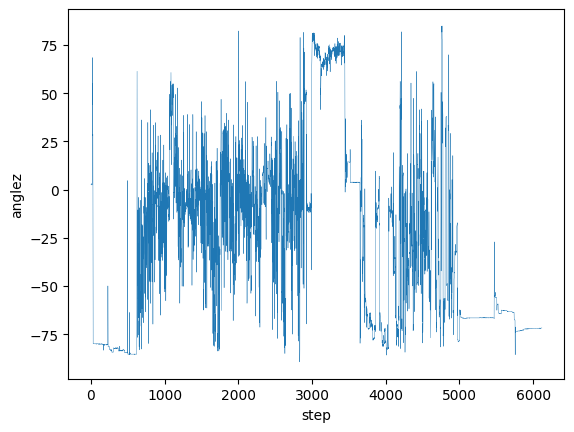

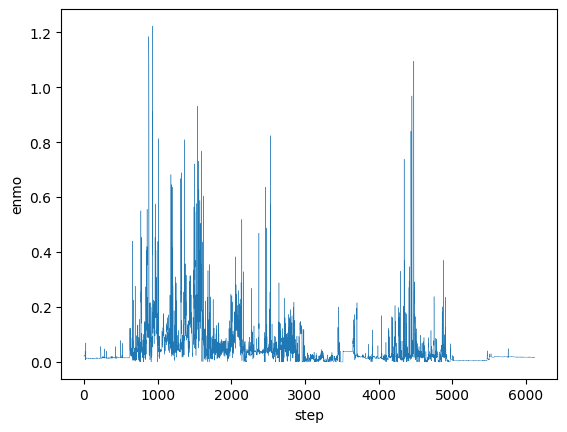

In [40]:
#plot anglez
plt.plot(p1_info.step, p1_info.anglez, lw=0.3)
plt.xlabel("step")
plt.ylabel("anglez")
plt.show()

#plot enmo
plt.plot(p1_info.step, p1_info.enmo, lw=0.3)
plt.xlabel("step")
plt.ylabel("enmo")
plt.show()